In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn.metrics as metrics

In [2]:
data: pd.DataFrame = pd.read_csv("M1_data.csv")
del data["domain"]
data

,trust_apple,interest_computers,age_computer,user_pcmac,appleproducts_count,familiarity_m1,f_batterylife,f_price,f_size,f_multitasking,...,f_performance,f_neural,f_synergy,f_performanceloss,m1_consideration,m1_purchase,gender,age_group,income_group,status
0,No,4,8,PC,0,No,5,4,3,4,...,2,2,1,1,1,Yes,Male,2,2,Student
1,Yes,2,4,PC,1,No,5,5,5,3,...,5,2,2,4,2,No,Male,2,3,Employed
2,Yes,5,6,PC,0,No,3,4,2,4,...,4,2,2,2,4,Yes,Male,2,2,Student
3,Yes,2,6,Apple,4,No,4,3,3,4,...,4,4,4,3,2,No,Female,2,2,Student
4,Yes,4,4,Apple,7,Yes,5,3,3,4,...,5,3,4,4,4,Yes,Male,5,7,Employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,Yes,5,0,PC,1,Yes,5,3,3,5,...,5,5,3,3,5,Yes,Male,3,3,Student
129,Yes,5,8,Apple,5,Yes,4,3,2,4,...,4,2,3,1,5,Yes,Male,3,5,Employed
130,Yes,4,0,Apple,8,Yes,5,4,3,5,...,5,4,4,5,5,Yes,Female,2,3,Student
131,Yes,5,5,Apple,4,Yes,5,3,4,4,...,5,2,3,3,5,Yes,Female,2,2,Student


In [3]:
data["status"].value_counts()

status
Student                 84
Employed                41
Self-Employed            5
Retired                  1
Student ant employed     1
Unemployed               1
Name: count, dtype: int64

In [4]:
data["trust_apple"].replace({"Yes" : 1, "No" : 0}, inplace=True)
data["m1_purchase"].replace({"Yes" : 1, "No" : 0}, inplace=True)
data["familiarity_m1"].replace({"Yes" : 1, "No" : 0}, inplace=True)
data["gender"].replace({"Male" : 1, "Female" : 0}, inplace=True)
data["status"].replace({"Student" : 0, "Retired" : 0, "Unemployed" : 0, "Student ant employed" : 1, "Employed" : 1, "Self-Employed" : 1}, inplace=True)
data["user_pcmac"].replace({"Apple" : 1, "PC" : 0, "Hp" : 0, "Other" : 0}, inplace=True)
data

,trust_apple,interest_computers,age_computer,user_pcmac,appleproducts_count,familiarity_m1,f_batterylife,f_price,f_size,f_multitasking,...,f_performance,f_neural,f_synergy,f_performanceloss,m1_consideration,m1_purchase,gender,age_group,income_group,status
0,0,4,8,0,0,0,5,4,3,4,...,2,2,1,1,1,1,1,2,2,0
1,1,2,4,0,1,0,5,5,5,3,...,5,2,2,4,2,0,1,2,3,1
2,1,5,6,0,0,0,3,4,2,4,...,4,2,2,2,4,1,1,2,2,0
3,1,2,6,1,4,0,4,3,3,4,...,4,4,4,3,2,0,0,2,2,0
4,1,4,4,1,7,1,5,3,3,4,...,5,3,4,4,4,1,1,5,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,1,5,0,0,1,1,5,3,3,5,...,5,5,3,3,5,1,1,3,3,0
129,1,5,8,1,5,1,4,3,2,4,...,4,2,3,1,5,1,1,3,5,1
130,1,4,0,1,8,1,5,4,3,5,...,5,4,4,5,5,1,0,2,3,0
131,1,5,5,1,4,1,5,3,4,4,...,5,2,3,3,5,1,0,2,2,0


In [5]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram

In [6]:
models = []
score1 = []
score2 = []

for i in range(2, 10):
    model = KMeans(n_clusters=i, random_state=123, init='k-means++').fit(data)
    models.append(model)
    score1.append(model.inertia_)
    score2.append(silhouette_score(data, model.labels_))

c:\Users\Farukh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Farukh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Farukh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Farukh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\

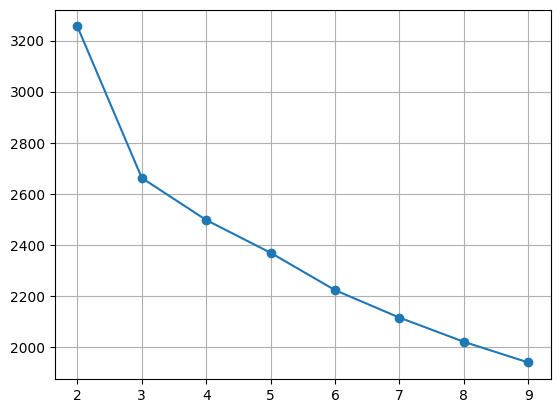

In [7]:
plt.grid()
plt.plot(np.arange(2, 10), score1, marker = "o")
plt.show()

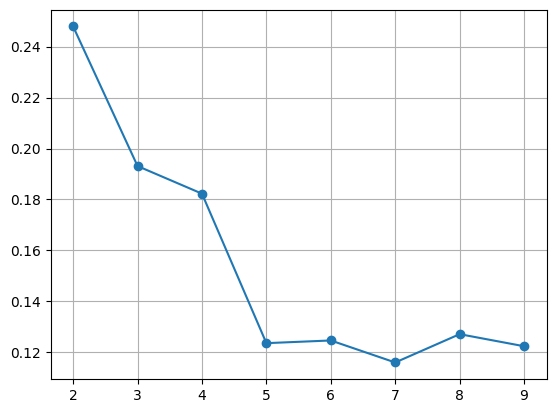

In [8]:
plt.grid()
plt.plot(np.arange(2, 10), score2, marker = "o")
plt.show()

In [9]:
model1 = KMeans(n_clusters=5, random_state=123, init="k-means++")
model1.fit(data)
model1.cluster_centers_

c:\Users\Farukh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[0.91304348, 3.65217391, 0.52173913, 0.82608696, 3.39130435,
        0.60869565, 4.30434783, 3.34782609, 3.43478261, 3.95652174,
        3.82608696, 4.13043478, 3.2173913 , 4.13043478, 4.04347826,
        3.91304348, 0.82608696, 0.34782609, 2.13043478, 2.34782609,
        0.26086957],
       [0.80952381, 3.47619048, 5.80952381, 0.33333333, 0.95238095,
        0.23809524, 4.33333333, 4.23809524, 2.57142857, 3.9047619 ,
        2.95238095, 3.95238095, 2.52380952, 2.66666667, 2.95238095,
        2.80952381, 0.33333333, 0.57142857, 2.52380952, 2.33333333,
        0.38095238],
       [1.        , 3.82608696, 2.7826087 , 0.7826087 , 4.2173913 ,
        0.43478261, 4.47826087, 3.2173913 , 3.30434783, 4.13043478,
        3.91304348, 4.65217391, 3.13043478, 4.04347826, 3.52173913,
        3.95652174, 0.7826087 , 0.73913043, 6.30434783, 6.52173913,
        0.95652174],
       [0.90625   , 3.75      , 4.6875    , 0.9375    , 3.46875   ,
        0.34375   , 4.59375   , 4.125     , 2.96875  

In [10]:
claster_k = model1.labels_
# data["clasters_k"].value_counts()

In [11]:
from sklearn.cluster import AgglomerativeClustering

In [12]:
model2 = AgglomerativeClustering(5, compute_distances=True)
claster_ier = model2.fit(data).labels_
claster_ier

array([0, 2, 0, 0, 1, 2, 1, 2, 1, 1, 2, 2, 1, 0, 0, 1, 0, 2, 4, 2, 0, 1,
       0, 2, 4, 2, 1, 2, 2, 3, 4, 2, 2, 3, 3, 0, 1, 3, 0, 0, 0, 0, 4, 2,
       2, 4, 0, 3, 1, 4, 0, 2, 2, 0, 4, 0, 0, 2, 1, 3, 4, 0, 2, 0, 4, 2,
       0, 2, 4, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 4, 1, 4, 0,
       0, 0, 4, 3, 3, 2, 1, 0, 2, 2, 0, 2, 4, 2, 2, 4, 4, 4, 0, 0, 0, 2,
       0, 2, 2, 0, 2, 0, 4, 0, 0, 0, 2, 0, 2, 0, 0, 1, 3, 2, 2, 1, 4, 0,
       1], dtype=int64)

In [13]:
from sklearn.cluster import DBSCAN

In [81]:
model3 = DBSCAN(eps=5, min_samples=5).fit(data)
model3.labels_

array([-1, -1,  2,  0,  1,  0,  1,  6,  1, -1,  0,  4, -1,  0, -1,  1,  0,
       -1,  4, -1,  0, -1,  2,  0, -1,  4,  1,  2, -1,  3,  4,  4,  0,  5,
        3,  0,  1,  3,  0,  0,  0, -1,  4, -1,  0,  4,  0, -1, -1, -1,  0,
       -1,  4,  0, -1,  0,  0,  0,  0,  3,  4,  0,  0,  0,  4, -1, -1, -1,
        4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2, -1,  4,  0,  0,  0, -1,
        1,  4,  0,  0, -1,  4,  1, -1, -1, -1,  0,  0,  6,  0,  0,  4,  6,
        6,  4,  4, -1,  0,  0,  0,  6,  0,  0,  2,  0,  0, -1, -1,  0,  0,
        0,  6,  0,  0,  0,  0, -1,  3,  0,  0, -1,  4,  0,  1],
      dtype=int64)

In [77]:
data["claster_k"] = claster_k
data["claster_ier"] = claster_ier
data["claster_dbscan"] = model3.labels_

In [83]:
import plotly.graph_objects as go

In [84]:
data["claster_k"].value_counts()
fig1 = go.Figure(data=[go.Scatter3d(x=data["trust_apple"], y=data["f_performance"], z=data["m1_purchase"],mode="markers", marker_color=data["claster_k"], marker_size=8)])
fig1.show()

In [86]:
data["claster_ier"].value_counts()
fig2 = go.Figure(data=[go.Scatter3d(x=data["trust_apple"], y=data["f_performance"], z=data["m1_purchase"],mode="markers", marker_color=data["claster_ier"], marker_size=8)])
fig2.show()

In [89]:
data["claster_dbscan"].value_counts()
fig3 = go.Figure(data=[go.Scatter3d(x=data["trust_apple"], y=data["f_performance"], z=data["m1_purchase"],mode="markers", marker_color=data["claster_dbscan"], marker_size=8)])
fig3.show()